In [ ]:
#Article Classifier

import pandas as pd
import csv
import numpy as np
import re
from datetime import date, time, datetime, timedelta

#For Zack's articles
from datetime import date, time, datetime, timedelta

#Read relevant CSV file
US_Stocks = pd.read_csv('Netflix_News_API_cleaned.csv')
ms_5_d = pd.read_csv('NFLXPriceDown0.03.csv')


tix = US_Stocks['publishedAt']
tix = pd.DataFrame(tix)

tic = [str(x) for x in tix['publishedAt']] #converting text to str

dates = [datetime.strptime(x, '%Y-%m-%d') for x in tic] #creating a list of dates

dates
#Realigning axises
US_Stocks.drop('publishedAt',axis=1,inplace = True)
US_Stocks['publishedAt'] = dates
cols_sel = ['publishedAt', 'title','description', 'content','url']

# cols_sel = ['Date', 'Content']
US_Stocks = US_Stocks[cols_sel]

#Setting Conditions


ms_5_d_date = [str(x) for x in ms_5_d['Price Change Date']]

ms_5_d_date

m_dates = [datetime.strptime(x, '%m/%d/%Y') for x in ms_5_d_date]

i = 1

# final_result = pd.DataFrame(data={'Date': [], 'Title': [], 'Tag': [], 'Content': []})

final_result = pd.DataFrame(data={'publishedAt': [], 'title': [], 'content': [], 'description': [],'url':[]})

for x in m_dates:
    cond1= US_Stocks['publishedAt'] == x
#     cond2= US_Stocks['Date'] == x - timedelta(days=1)
    
    result = US_Stocks[cond1]
    final_result = final_result.append(result)


final_result.rename(index=str, columns={"content": "Content", "title": "Title", "publishedAt": "Date"},inplace=True)

final_result.to_csv('Netflix_Down0.03_News_API.csv')

final_result

In [2]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

from nltk.corpus import stopwords
from tqdm import tqdm

import nltk
import numpy as np
from sklearn.utils import shuffle
import pandas as pd

from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup

#initializing lemmatizer which turns words into its base form
wordnet_lemmatizer = WordNetLemmatizer()


#Original
stopwords = set(w.rstrip() for w in open('C:\\Users\\Kyle Ker\\Documents\\GitHub\\machine_learning_examples\\nlp_class\\stopwords_original.txt'))
#Modified
stopwords = set(w.rstrip() for w in open('C:\\Users\\Kyle Ker\\Documents\\GitHub\\machine_learning_examples\\nlp_class\\stopwords - Copy.txt'))
stopwords

{'//www.zacks.com',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '500',
 'a',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'alert',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amazon.com',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'click',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'downed',
 'downing',
 'download',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'end',
 'ended',

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')
newStopWords = ['#name?']
stop.extend(newStopWords)

counter ='microsoft'
positive_news = pd.read_csv('Microsoft_Up0.03_News_API.csv')
negative_news = pd.read_csv('Microsoft_Down0.03_News_API.csv')

#drop empty columns
positive_news = positive_news.dropna()
negative_news = negative_news.dropna()

positive_news = shuffle(positive_news) #if not some dates maybe cut off if len of positive news and neg news are different
positive_news = positive_news[:len(negative_news)]

positive_news_clean = positive_news['Content']
negative_news_clean = negative_news['Content']

positive_news_clean_date = positive_news['Date']
negative_news_clean_date = negative_news['Date']

positive_news_clean_title = positive_news['title']
negative_news_clean_title = negative_news['title']

positive_news_clean_description = positive_news['description']
negative_news_clean_description = negative_news['description']

positive_news_clean_url = positive_news['url']
negative_news_clean_url = negative_news['url']


positive_news_clean = positive_news_clean[:len(negative_news_clean)]
positive_news_clean_date = positive_news_clean_date[:len(negative_news_clean_date)]
positive_news_clean_title = positive_news_clean_title[:len(negative_news_clean_title)]
positive_news_clean_description = positive_news_clean_description[:len(negative_news_clean_description)]
positive_news_clean_url = positive_news_clean_url[:len(negative_news_clean_url)]

#setting criteria - display only content
cols_sel = ['Content']

positive_news = positive_news[cols_sel]
negative_news =negative_news[cols_sel]
positive_news_str = positive_news.astype(str)
negative_news_str = negative_news.astype(str)

#making it lowercase
positive_news['Content'] = positive_news['Content'].str.lower().str.split()
negative_news['Content'] = negative_news['Content'].str.lower().str.split()

positive_news = positive_news['Content'].apply(lambda x: [item for item in x if item not in stop])
negative_news = negative_news['Content'].apply(lambda x: [item for item in x if item not in stop])

len(negative_news_clean_url)+len(positive_news_clean_url)

228

In [4]:
word_index_map = {}
current_index = 0
positive_tokenized = []
negative_tokenized = []
orig_reviews = []
orig_reviews_clean=[]
Date=[]
Title =[]
Description=[]
URL=[]

count = 0
count_1 = 0
            
for news in positive_news:
    tokens = news
    positive_tokenized.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1

for news in positive_news:
    orig_reviews.append(news)
    
for news in positive_news_clean:
    orig_reviews_clean.append(news)
    
for date in positive_news_clean_date:
    Date.append(date)

for title in positive_news_clean_title:
    Title.append(title)
    
for description in positive_news_clean_description:
    Description.append(description)
    
for url in positive_news_clean_url:
    URL.append(url)
    

for news in negative_news:
    tokens = news
    negative_tokenized.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token] = current_index
            current_index += 1

for news in negative_news:
    orig_reviews.append(news)
    
for news in negative_news_clean:
    orig_reviews_clean.append(news)

for date in negative_news_clean_date:
    Date.append(date)
    
for title in negative_news_clean_title:
    Title.append(title)
    
for description in negative_news_clean_description:
    Description.append(description)

for url in negative_news_clean_url:
    URL.append(url)


print("len(word_index_map):", len(word_index_map))

Description

current_index

len(word_index_map): 4277


4277

In [5]:
len(negative_news)
len(positive_news)

114

In [6]:
'''taking each token and creating a data array, whereby it will just be a bumch of numbers and word proportion will be used.
Because I want to shuffle my training test sets again, going to want ot put both the labels and vector, 
pass in both tokens and label to shuffle it
'''
# now let's create our input matrices
def tokens_to_vector(tokens, label):
    x = np.zeros(len(word_index_map) + 1) # last element is for the label
    for t in tokens: #for each word within each of the selected article
        i = word_index_map[t] #i will be equal to the value of the integer assigned to each token
        x[i] += 1
    x = x / x.sum() # normalize it before setting label
    x[-1] = label #setting the last element to the label
    return x

N = len(positive_tokenized) + len(negative_tokenized) #N is the total number of articles each with a different number of tokens (positive or negative words)
# (N x D+1 matrix - keeping them together for now so we can shuffle more easily later
data = np.zeros((N, len(word_index_map) + 1)) #creates list of zeros,no. of rows is N number of zeros per list are len(word_index_map) + 1
i = 0

for tokens in positive_tokenized:
    xy = tokens_to_vector(tokens, 1)
    data[i,:] = xy
    i += 1
#     print(xy)

for tokens in negative_tokenized:
    xy = tokens_to_vector(tokens, 0)
    data[i,:] = xy
    i += 1
#     print(xy)
len(word_index_map)
N

data.shape

(228, 4278)

In [21]:
# shuffle the data and create train/test splits
# try it multiple times!

train_score =[]
test_score =[]

# data=data.reshape((999,1))

for i in range(0,10):
    orig_reviews, data, Date, Title, Description, URL = shuffle(orig_reviews, data, Date, Title, Description, URL)

    X = data[:,:-1] #all rows except the last column of them, basically the 1
    Y = data[:,-1] #returns last row of data

    # last 50 rows will be test
    Xtrain = X[:-50,]
    Ytrain = Y[:-50,]
    Xtest = X[-150:,]
    Ytest = Y[-150:,]

    model = LogisticRegression()
    model.fit(Xtrain, Ytrain)
    model_train_score = model.score(Xtrain, Ytrain)
    model_test_score = model.score(Xtest, Ytest)
    train_score.append(model_train_score)
    test_score.append(model_test_score)

print(train_score)
print(test_score)

def average(lst): 
    return sum(lst) / len(lst) 

# print(average(train_score))
# print(average(test_score))
print("Microsoft's Train accuracy:", average(train_score))
print("Microsoft's Test accuracy:", average(test_score))



C:\Users\Kyle Ker\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kyle Ker\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kyle Ker\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kyle Ker\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kyle Ker\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

[0.7640449438202247, 0.5955056179775281, 0.5449438202247191, 0.5898876404494382, 0.9157303370786517, 0.5168539325842697, 0.550561797752809, 0.5393258426966292, 0.7303370786516854, 0.7134831460674157]
[0.7133333333333334, 0.58, 0.5133333333333333, 0.5666666666666667, 0.7933333333333333, 0.49333333333333335, 0.5466666666666666, 0.5266666666666666, 0.6866666666666666, 0.6666666666666666]
Microsoft's Train accuracy: 0.6460674157303372
Microsoft's Test accuracy: 0.6086666666666666


In [32]:
# let's look at the weights for each word
# try it with different threshold values!
word_list = []
word_weight_list = []

threshold = 0.13
for word, index in iteritems(word_index_map):
    weight = model.coef_[0][index]
    if weight > threshold or weight < -threshold:
        print(word, weight)
        word_list.append(word)
        word_weight_list.append(weight)
        
d = {'Word_List':word_list,'Word_Weight_List':word_weight_list}
word_list = pd.DataFrame(d)
word_list = word_list.sort_values(by='Word_Weight_List', ascending = False)

# check misclassified examples
preds = model.predict(X)
P = model.predict_proba(X)[:,1] # p(y = 1 | x)

# since there are many, just print the "most" wrong samples
minP_whenYis1 = 1
maxP_whenYis0 = 0
wrong_positive_review = None
wrong_negative_review = None
wrong_positive_prediction = None
wrong_negative_prediction = None
for i in range(N):
    p = P[i]
    y = Y[i]
    if y == 1 and p < 0.5:
        if p < minP_whenYis1:
            wrong_positive_review = orig_reviews[i]
            wrong_positive_prediction = preds[i]
            minP_whenYis1 = p
    elif y == 0 and p > 0.5:
        if p > maxP_whenYis0:
            wrong_negative_review = orig_reviews[i]
            wrong_negative_prediction = preds[i]
            maxP_whenYis0 = p

print("Most wrong positive review (prob = %s, pred = %s):" % (minP_whenYis1, wrong_positive_prediction))
print(wrong_positive_review)
print("Most wrong negative review (prob = %s, pred = %s):" % (maxP_whenYis0, wrong_negative_prediction))
print(wrong_negative_review)

word_list.to_csv(counter + '_word_list.csv')
word_list

coronavirus 0.1699968306896638
home 0.15581762130111745
microsoft 0.42841844865458795
amazon 0.19324970333177882
cloud 0.1484033084850354
court 0.151797709128847
new -0.20232853663709927
bill 0.2837521553600019
gates 0.34925884110900923
board 0.14762866509699404
announced 0.14752778789924198
xbox -0.17289667602728728
series -0.15044370276188315
business -0.13921710980992208
Most wrong positive review (prob = 0.4849405447032842, pred = 0.0):
['<ul><li>a', 'new', 'report', 'notes', 'next-generation', 'consoles', 'might', 'delayed.</li><li>this,', 'course,', 'due', 'coronavirus', 'spread.</li><li>on', 'bright', 'side,', 'gamers', 'win', 'either', 'way.</li></ul>this', 'supposed', 'year', 'xbox', 'series', 'x', 'a…', '[+2707', 'chars]', 'ps5', 'xbox', 'series', 'x', 'holiday', '2020', 'release', 'dates,', 'might', 'next', 'victims', 'coronavirus', 'pandemic.', 'post', 'ps5', '&', 'xbox', 'series', 'x', 'release', 'dates', 'may', 'coronavirus’', 'next', 'victims', 'appeared', 'first', 'ccn.

,Word_List,Word_Weight_List
2,microsoft,0.428418
8,gates,0.349259
7,bill,0.283752
3,amazon,0.193250
0,coronavirus,0.169997
1,home,0.155818
5,court,0.151798
4,cloud,0.148403
9,board,0.147629
10,announced,0.147528


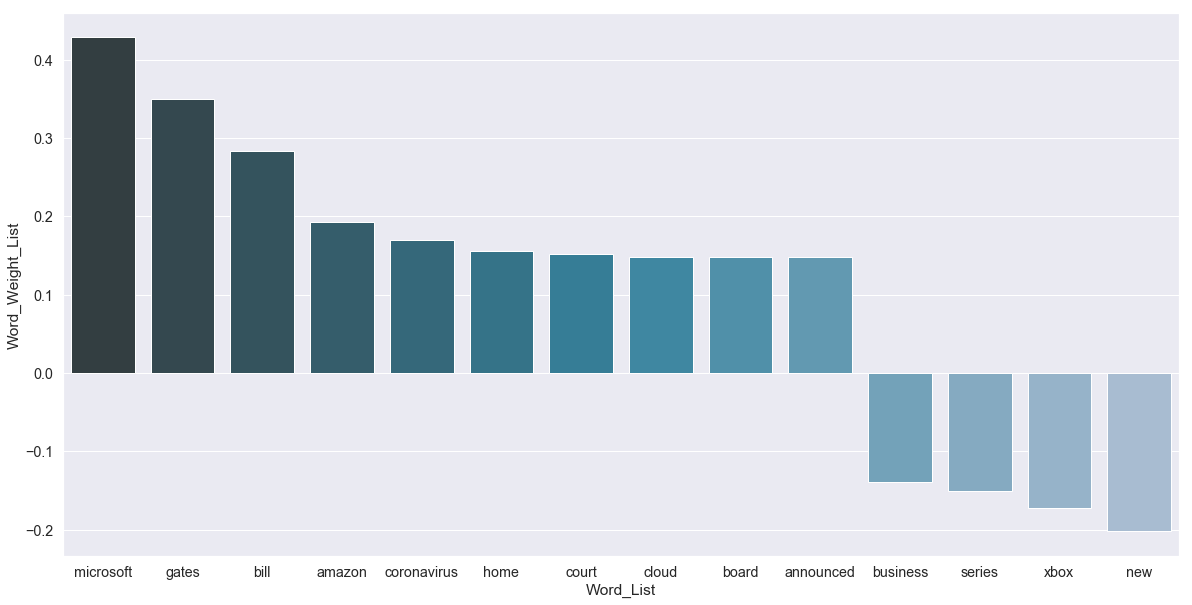

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="Word_List", y="Word_Weight_List", data=word_list, palette="PuBuGn_d", ax=ax)
plt.show();

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(criterion='entropy',random_state = 0)
tree.fit(Xtrain,Ytrain)

pred = tree.predict(Xtest)

print('Decision Tree Accuracy: {}'.format(accuracy_score(Ytest, pred)))
print('<Predicted>\n{}\n\n<Tru>\n{}'.format(pred,Ytest))

Decision Tree Accuracy: 0.8266666666666667
<Predicted>
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1.]

<Tru>
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 1.]


In [11]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 123)
xg_cl = xgb.XGBClassifier(objective='binary:logistic', seed =123)

xg_cl.fit(X_train, y_train)
xg_cl.score(X_train, y_train)
xg_cl.score(X_test, y_test)

0.5072463768115942

In [12]:
#Ranking the articles
minP_whenYis1 = 1
maxP_whenYis0 = 0
wrong_positive_review = None
wrong_negative_review = None
wrong_positive_prediction = None
wrong_negative_prediction = None
right_positive_reviews =[]
right_positive_reviews_score =[]
right_negative_reviews =[]
right_negative_reviews_score =[]
right_positive_reviews_date = []
right_negative_reviews_date = []
right_positive_reviews_title= []
right_negative_reviews_title = []
right_positive_reviews_description = []
right_negative_reviews_description = []
Counter_up = []
Direction_up =[]
Counter_down = []
Direction_down =[]
right_positive_reviews_url = []
right_negative_reviews_url = []


for i in range(N):
    p = P[i]
    y = Y[i]
    if y == 1 and p > 0.5:
        right_positive_reviews.append(orig_reviews_clean[i])
        right_positive_reviews_score.append(p)
        right_positive_reviews_date.append(Date[i])
        right_positive_reviews_title.append(Title[i])
        right_positive_reviews_description.append(Description[i])
        Counter_up.append(counter)
        Direction_up.append('up')
        right_positive_reviews_url.append(URL[i])
        
    elif y == 0 and p < 0.5:
        right_negative_reviews.append(orig_reviews_clean[i])
        right_negative_reviews_score.append(p)
        right_negative_reviews_date.append(Date[i])
        right_negative_reviews_title.append(Title[i])
        right_negative_reviews_description.append(Description[i])
        Counter_down.append(counter)
        Direction_down.append('down')
        right_negative_reviews_url.append(URL[i])
        
right_positive_reviews_dict = {'Counter': Counter_up,'Direction': Direction_up,'Content':right_positive_reviews, 'Score':right_positive_reviews_score, 'Date':right_positive_reviews_date, 'Title':right_positive_reviews_title,'Description':right_positive_reviews_description, 'URL':right_positive_reviews_url}

right_positive_reviews_df = pd.DataFrame(right_positive_reviews_dict)
right_positive_reviews_df = right_positive_reviews_df.sort_values(by = 'Score', ascending = False)
# right_positive_reviews_df = right_positive_reviews_df.sort_values(by = 'Date', ascending = False)
right_positive_reviews_df

right_negative_review_dict = {'Counter': Counter_down,'Direction': Direction_down, 'Content':right_negative_reviews, 'Score':right_negative_reviews_score, 'Date':right_negative_reviews_date,'Title':right_negative_reviews_title,'Description':right_negative_reviews_description, 'URL':right_negative_reviews_url}

right_negative_reviews_df = pd.DataFrame(right_negative_review_dict)
right_negative_reviews_df = right_negative_reviews_df.sort_values(by = 'Score', ascending = False)
# right_negative_reviews_df = right_negative_reviews_df.sort_values(by = 'Date', ascending = False)
right_negative_reviews_df

cols_sel_2 = ['Counter', 'Direction', 'Date', 'Title', 'Description','Score','URL']

right_positive_reviews_df =right_positive_reviews_df[cols_sel_2]
right_positive_reviews_df=right_positive_reviews_df.groupby('Date').head(5)
right_positive_reviews_df = right_positive_reviews_df.sort_values(by = 'Date', ascending = False)
# right_positive_reviews_df.to_csv('microsoft_right_positive_news_df.csv')
right_positive_reviews_df


right_negative_reviews_df = right_negative_reviews_df[cols_sel_2]
right_negative_reviews_df = right_negative_reviews_df.groupby('Date').tail(5)
right_negative_reviews_df = right_negative_reviews_df.sort_values(by = 'Date', ascending = False)
# right_negative_reviews_df.to_csv('microsoft_right_negative_news_df.csv')

right_negative_reviews_df
right_positive_reviews_df

# right_positive_reviews_date
reviews_all = pd.concat([right_negative_reviews_df,right_positive_reviews_df])
reviews_all.to_csv(counter + '_all_reviews.csv')
reviews_all

,Counter,Direction,Date,Title,Description,Score,URL
22,microsoft,up,3/30/2020,Microsoft Teams is coming to consumers — but S...,Microsoft today announced that later this year...,0.537433,http://techcrunch.com/2020/03/30/microsoft-tea...
79,microsoft,up,3/30/2020,Microsoft brings Teams to consumers and launch...,Microsoft today announced a slew of new produc...,0.529992,https://techcrunch.com/2020/03/30/office-365-b...
11,microsoft,up,3/30/2020,Microsoft says Skype users surge amid coronavi...,Microsoft Corp said on Monday its video callin...,0.532397,https://www.reuters.com/article/us-microsoft-s...
18,microsoft,up,3/30/2020,Microsoft Teams is coming to consumers -- but ...,Microsoft today announced that later this year...,0.537374,https://techcrunch.com/2020/03/30/microsoft-te...
96,microsoft,up,3/30/2020,Microsoft jumps 7% as cloud services see pickup,Microsoft shares rose as investors processed d...,0.530287,https://www.cnbc.com/2020/03/30/microsoft-jump...
62,microsoft,up,3/26/2020,Coronavirus: NHS uses tech giants to plan cris...,Amazon and Microsoft are among those helping w...,0.527341,https://www.bbc.co.uk/news/technology-52053565
7,microsoft,up,3/26/2020,"Microsoft acquires Affirmed Networks, which he...",Affirmed already works with major network oper...,0.525739,https://www.cnbc.com/2020/03/26/microsoft-acqu...
88,microsoft,up,3/26/2020,How to Spring Clean Your Online Accounts Now T...,Being isolated at home means you have more tim...,0.525172,https://gizmodo.com/how-to-spring-clean-your-o...
80,microsoft,up,3/26/2020,Seattle transit authority sues Microsoft over ...,SEATTLE (AP) — The Central Puget Sound Regiona...,0.530487,https://apnews.com/773974a7bc0b1b8ec93508682a3...
76,microsoft,up,3/26/2020,Major advertising holding company IPG withdraw...,One of the largest advertising holding compani...,0.523459,https://www.cnbc.com/2020/03/26/ipg-withdraws-...
